# Project 4: Image Classification and Feature Extraction
---
Vito Roberto and Lara Vignotto - 6 April 2021

## Assignments

Please, edit your report by fulfilling the following list of assignments.

**Introduction.** Short summary of the goals of the  project. The sections composing the report.

**Section 1. Data loading and preparation**

Download, decompress, analyse:

https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

* 1a. Download the dataset;
* 1b. Load the dataset and check its characteristics;
* 1c. Show the first 4 images for each category;
* 1d. Data preparation.

**Section 2. The AlexNet model** 
* 2a. Download the net, not pre-trained.

**Section 3. Training the Net**
* 3a. Design the architecture;
* 3b. Define the batch size and load the training and test set;
* 3c. Define a training function;
* 3d. Run the training;
* 3e. Save the trained network.

**Section 4. Test and performance evaluations**
* 4a. Define and execute a test function;
* 4b. Performance curves.

**Section 5. Extracting features**
* 5a. Load the saved network and set it in evaluation mode;
* 5b. Visualize the learned kernels of the first convolutional layer;
* 5c. Visualize the feature maps.

**Results, Observations and Conclusions**
Write your own notes, observations and conclusions about the results of your work.

**Full Code**
Report the complete code of the project.

## Introduction

This report is divided in ...TODO 

The aim of this project is ...TODO

## 1. Data loading and preparation

Import the libraries.

In [ ]:
!pip install torch-inspect

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

# 1a. Download the dataset
from torchvision.datasets.utils import download_and_extract_archive

# 2a. (show AlexNet structure)
import torch_inspect as ti 

Define the device to use during the computation.

In [ ]:
## TODO: if available use GPU, else use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 1a. Download the dataset
Description of the dataset: [tf_flowers](https://www.tensorflow.org/datasets/catalog/tf_flowers).

In [ ]:
# download flower_photos  
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #URL to download file from
filename = "flower_photos.tgz" #name to save the file under
root = "~/tmp/" #directory to place downloaded file in
download_and_extract_archive(url, root, filename)


Extracting /root/tmp/flower_photos.tgz to flower_photos.tgz


### 1b. Load the dataset and check its characteristics

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

## TODO: load the dataset into the 'data' variable
# use ImageFolder -> https://pytorch.org/vision/stable/datasets.html#imagefolder
# hints: 
#   * you only need 'root' and 'transform';
#   * use 'flower_photos.tgz/flower_photos/' as root.

data = torchvision.datasets.ImageFolder('flower_photos.tgz/flower_photos/', transform)


## TODO: check the dataset size and get the names of the classes
# hint: check the attributes of the ImageFolder class to get the classes' names
# https://pytorch.org/vision/stable/_modules/torchvision/datasets/folder.html#ImageFolder

print("Classes: "+str(data.classes))
print("Dataset size: "+str(len(data)))


Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Dataset size: 3670


#### Summarize the number of images for each category and display the summary in a table

In [ ]:
# calculate the number of samples in each class:
#   * torch.unique returns the unique elements of the input tensor;
#   * the .targets attrubute gets the class_index value for each image in the dataset.
_, imgs_per_class = torch.unique(torch.tensor(data.targets), return_counts=True)

## TODO: print the number of elements in each class
# hint: print 'imgs_per_class' to inspect it

print(imgs_per_class.numpy())

for label, num_of_imgs in zip(data.classes, imgs_per_class):
  print("There are {} elements in the class {}'". format(num_of_imgs, label))
  


[633 898 641 699 799]
There are 633 elements in the class daisy'
There are 898 elements in the class dandelion'
There are 641 elements in the class roses'
There are 699 elements in the class sunflowers'
There are 799 elements in the class tulips'


#### Print the resolution of the first image for each category

Note that the samples are arranged per class, meaning that the first N images belong to class 0, the following M elements belong to the class 1, and so on.

In [ ]:
## TODO: print the resolution of the first image for each category

# Note: there are many ways to do this, here's a suggestion:
#   * get the number of the classes;
#   * create a dictionary that maps the labels (integers) to the name of the class;
#   * create a list with the indices of the first image of each class. You already have
#     the number of elements in each class, you could incrementally add them to get the
#     indices using 'accumulate' from 'itertools' ('from itertools import accumulate');
#   * now you have all the data you need and can print the resolution of the 
#     first image for each category.

num_classes=len(data.classes) #5

my_dict={}
for i in range (0, num_classes):
  my_dict[i]=data.classes[i]

my_list=[]
my_list.append(0)
for i in range (1, num_classes):
    my_list.append(my_list[i-1]+imgs_per_class.numpy()[i-1])


# print("Resolution of the first image of the class:")
for i in range(0, len(my_list)):
    img, label = data[my_list[i]]
    height = img.shape[1]
    width = img.shape[2]
    print("\t"+str(data.classes[i])+" is -> "+str(height)+"x"+str(width))

	daisy is -> 263x320
	dandelion is -> 213x320
	roses is -> 240x179
	sunflowers is -> 330x500
	tulips is -> 209x320


### 1c. Show the first 4 images for each category
Print them in a grid with 4 columns (samples) and 5 rows (classes).

[0, 633, 1531, 2172, 2871]


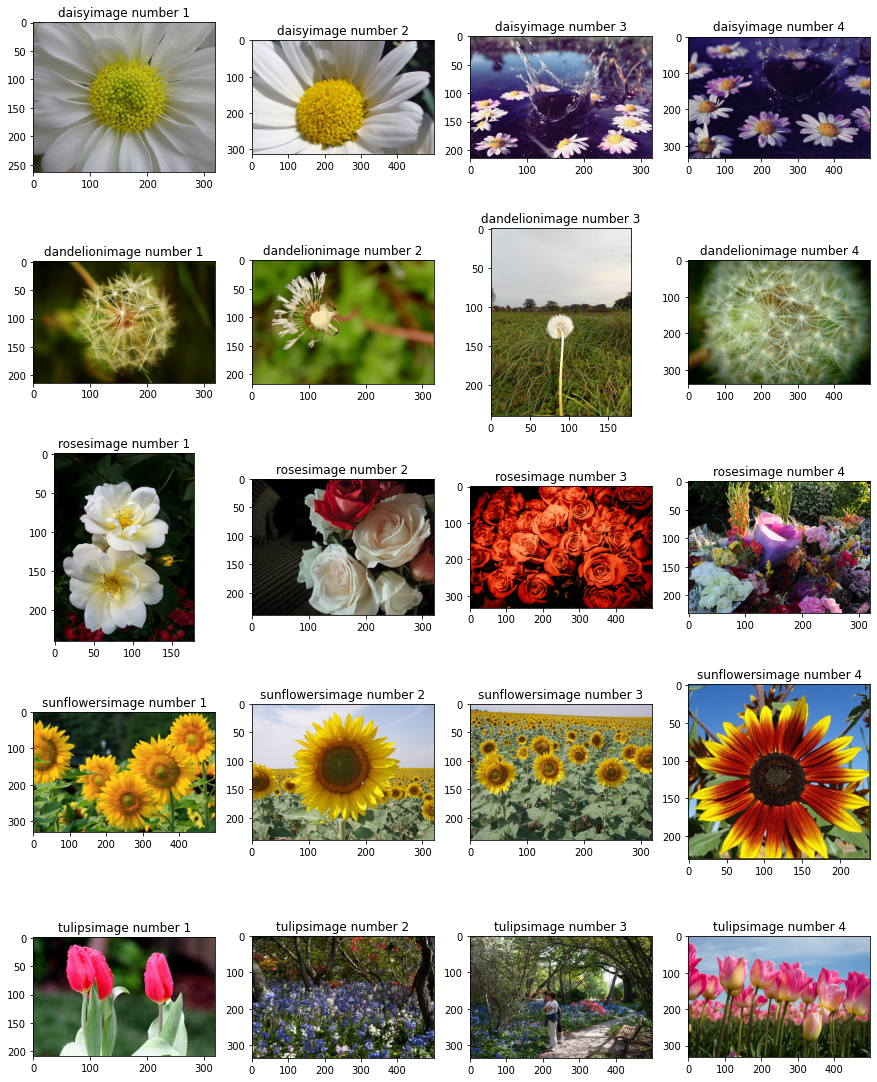

In [ ]:
## TODO: show the first 4 images for each category

print(my_list)
figure=plt.figure(figsize=(15,20))
# plt.subplots_adjust(hspace=0.5, wspace=0.5)
cols, rows = 4, len(data.classes)

res=[];
for j in my_list:
  for i in range(int(j), int(j+4)):
    res.append(i)

    # print(res)

for i in range(1, cols * rows + 1):
  img, label = data[res[i-1]]
  figure.add_subplot(rows, cols, i)
  plt.title(my_dict[label]+"image number "+str(1+((i-1)%cols)))
  plt.imshow(np.clip(img.permute(1, 2, 0), 0., 1.))

plt.show()

### 1d. Data preparation

#### Load and normalize the data

Resize the images to 64x64 pixels and normalize the pixel values.

To normalize ([documentation](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize)) the tensor images, calculate the mean and standard deviation for the 3 colour channels of the images over the entire dataset.

In [ ]:
IMGS_DIM = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((IMGS_DIM, IMGS_DIM)) #resize all images to IMGS_DIMxIMGS_DIM pixels
])

## TODO: load the dataset into the 'data' variable as before
data = torchvision.datasets.ImageFolder('flower_photos.tgz/flower_photos/', transform)

# stack all the images by iterating over the dataset and extracting the images
imgs = torch.stack([img for img, _ in data], dim=3)
print(imgs.shape)

# keep 3 channels and merge all the remaining dimensions into one 
temp = imgs.view(3, -1)
print(temp.shape)

# calculate the mean over the elements of each channel
mean = temp.mean(dim=1)

# calculate the standard deviation over the elements of each channel
std = temp.std(dim=1)

print(mean, std)

torch.Size([3, 64, 64, 3670])
torch.Size([3, 15032320])
tensor([0.4665, 0.4251, 0.3040]) tensor([0.2992, 0.2699, 0.2933])


Use these values to normalize our data.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std), #normalize the pixel values
    transforms.Resize((IMGS_DIM, IMGS_DIM)) #resize all images to IMGS_DIMxIMGS_DIM pixels
])

## TODO: load the dataset into the 'data' variable as before
data = torchvision.datasets.ImageFolder('flower_photos.tgz/flower_photos/', transform)

#### Constrain to 70 the number of images per category. Check this by printing a table

In [ ]:
## TODO: get all the first 70 indices for each class
# put them in a list called 'indices'; use the list with the indices of 
# the first image of each class you created in 1a.

indices=[];
for j in my_list:
    for i in range(int(j),int(j+70)):
        indices.append(i)
    
print(indices)


# create a subset of the original dataset with just 70 samples per class
data2 = torch.utils.data.Subset(data, indices)

## TODO: 
#   * check if the size of the dataset is 70x5=350
#   * check if each class contains 70 elements. Hint: you could use 'Counter'
#     ('from collections import Counter')

print("Dataset size: "+str(len(data2)))

from collections import Counter

c = Counter(obj[1] for obj in data2)

print(c)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1

#### Define the Training and Test sets (300/50) and randomize the images

Define the size of the training set and test set, and construct them randomizing the images using `random_split`.

In [ ]:
train_size = 300
test_size = 50

train_set, test_set = torch.utils.data.random_split(data2, [train_size, test_size])

## TODO: check training set and test set size

print("Lenght of Training set: "+str(len(train_set)))
print("Lenght of Test set: "+str(len(test_set)))



Lenght of Training set: 300
Lenght of Test set: 50


## 2. The AlexNet model

### 2a. Download the net, not pre-trained
Go to the [AlexNet page](https://pytorch.org/hub/pytorch_vision_alexnet/) on the PyTorch website and load the model.

In [ ]:
## TODO: download the AlexNet network, not pre-trained
import torch
model = torch.hub.load('pytorch/vision:v0.9.0', 'alexnet', pretrained = False)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


#### Show in your report a table with its structure
Visualize the network structure. Use the `torch-inspect` library ([PyPI](https://pypi.org/project/torch-inspect/), [GitHub](https://github.com/jettify/pytorch-inspect)) to visualize the network structure in more detail.

In [ ]:
## TODO: visualize the network structure
# use both 'model.eval()' and 'summary()' from the 'torch-inspect' library
import torch_inspect as ti
print(model.eval())
print(ti.summary(model, (3, 64, 64)))

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## 3. Training the Net

### 3a. Design the architecture
We modify some of the AlexNet layers to better suit our dataset. Consult the [documentation](https://pytorch.org/vision/stable/_modules/torchvision/models/alexnet.html).

In [ ]:
## TODO: modify the layers following these specifications:

# first convolutional layer
#   * set kernel size to 7
#   * set stride to 2
#   * set padding to 3 
model.features[0] = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)

# last linear layer (classifier)
#   * set output shape to 5 (there are 5 categories) 
model.classifier[6] = nn.Linear(in_features=4096, out_features=5, bias=True)


Visualize the modified architecture.

In [ ]:
## TODO: visualize the modified architecture
print(model.eval())

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

### 3b. Define the batch size and load the training and test set
We define a batch size of 4, and load the training set and test set with `DataLoader`.

In [ ]:
## TODO:
#   * define the 'BATCH_SIZE';
#   * load the training set and the test set in 'train_loader'
#     and 'test_loader'.

BATCH_SIZE = 4

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=BATCH_SIZE,
    shuffle=True
)


### 3c. Define a training function
Define a training function to loop over the epochs. First, specify the number of epochs (80) and the learning rate (0.01). Then, use the Stochastic Gradient Descent (SGD) as the optimization algorithm and the `CrossEntropyLoss` as thr performance estimate.


In [ ]:
## TODO:
#   * define 'NUM_EPOCHS' and 'LEARNING_RATE';
#   * define 'optimizer' (SGD) and 'error' (CrossEntropyLoss);
#   * complete the 'train' function. This function skeleton misses the
#     code to calculate and register the training accuracy. You can add
#     it to plot the accuracy curve later.

#...
NUM_EPOCHS = 80
LEARNING_RATE = 0.1

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
# the training function
def train(model, train_loader, NUM_EPOCHS):
    train_loss = [] #list to memorize the loss values
    accuracy_list=[]

    for epoch in range(NUM_EPOCHS): #loop over the epochs  
        running_loss = 0.0
        total = 0
        correct = 0
        
        for images, labels in train_loader:
            # get the inputs and load them to the computation device 
            images, labels = images.to(device), labels.to(device)

            # set the gradients to zero
            optimizer.zero_grad()

            # feedforward pass
            pred_labels = model(images)
            loss = error(pred_labels, labels)

            # backpropagation
            loss.backward()

            # update the parameters
            optimizer.step()

            running_loss += loss.item()

            pred_labels = torch.max(pred_labels, 1)[1]. to(device)
            correct += (pred_labels == labels).sum()
            total += len(labels)


        accuracy = correct * 100 / total
        accuracy_list.append(accuracy)

        # calculate the loss value and add it to the list    
        loss = running_loss / len(train_loader)
        train_loss.append(loss)
        # keep track of the training process
        print('Epoch {} of {}, Train Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, loss))

    return [train_loss, accuracy_list]
    

### 3d. Run the training

In [ ]:
# set the model in train mode
model.train()

## TODO:
#   * load the model to the computation device;
#   * execute the training function.

model.to(device)
lst=train(model, train_loader, NUM_EPOCHS)
train_loss=lst[0]
accuracy_list=lst[1]
""

Epoch 1 of 80, Train Loss: 1.6197
Epoch 2 of 80, Train Loss: 1.6191
Epoch 3 of 80, Train Loss: 1.6194
Epoch 4 of 80, Train Loss: 1.6161
Epoch 5 of 80, Train Loss: 1.6141
Epoch 6 of 80, Train Loss: 1.6146
Epoch 7 of 80, Train Loss: 1.6315
Epoch 8 of 80, Train Loss: 1.6235
Epoch 9 of 80, Train Loss: 1.6172
Epoch 10 of 80, Train Loss: 1.6178
Epoch 11 of 80, Train Loss: 1.6178
Epoch 12 of 80, Train Loss: 1.6153
Epoch 13 of 80, Train Loss: 1.6208
Epoch 14 of 80, Train Loss: 1.6158
Epoch 15 of 80, Train Loss: 1.6184
Epoch 16 of 80, Train Loss: 1.6171
Epoch 17 of 80, Train Loss: 1.6124
Epoch 18 of 80, Train Loss: 1.6201
Epoch 19 of 80, Train Loss: 1.6199
Epoch 20 of 80, Train Loss: 1.6105
Epoch 21 of 80, Train Loss: 1.6441
Epoch 22 of 80, Train Loss: 1.6179
Epoch 23 of 80, Train Loss: 1.6166
Epoch 24 of 80, Train Loss: 1.6174
Epoch 25 of 80, Train Loss: 1.6120
Epoch 26 of 80, Train Loss: 1.6372
Epoch 27 of 80, Train Loss: 1.6195
Epoch 28 of 80, Train Loss: 1.6182
Epoch 29 of 80, Train Loss: 1

### 3e. Save the trained network

In [ ]:
# save the model
print("Saving the model...")

try:
    torch.save(model.state_dict(), "AlexNet_flowers_saved_network.pth")
    print("Model saved!")
except:
    print("Could not save the model")

Saving the model...
Model saved!


## 4. Test and performance evaluations

In [ ]:
# set the model in evaluation mode
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

### 4a. Define and execute a test function 
Define a test function that calculates the accuracy of the trained network by giving it as inputs the test set. While doing so, print the first 2 batches of images of the test set; check whether their class prediction is correct; print the predicted class as compared the right one.

In [ ]:
## TODO: complete the 'test' function
# hint: it's similar to the testing part in the trainin loop in Project 1

labels_dict=my_dict
def test(model, test_loader):
    predictions_list = [] 
    total = 0
    correct = 0
    batch = 1 #batch counter
    
    for images, labels in test_loader:
        # get the inputs and load them to the computation device 
        # IMPORTANT: in Project 1 we also wrote the line
        # test = Variable(images.view(100, 1, 28, 28))
        # Since 'Variable()' is deprecated, omit this line, it is not needed.
        #...

        images, labels = images.to(device), labels.to(device)

        # prediction on the trained network
        outputs = model(images) 

        # get the predicted class
        predictions = torch.max(outputs, 1)[1].to(device) 
        # append the predicted class to 'predictions_list'
        predictions_list.append(predictions)

        correct += (predictions == labels).sum() #increase the correct predictions counter
                                                 #when the prediction matches the correct label
        total += len(labels) 

        if batch <= 2: #print the images only for the first 2 batches
            figure = plt.figure(figsize=(15, 20))
            cols, rows = BATCH_SIZE, 1
            for j in range(cols):
                # visualize the images of the batch
                figure.add_subplot(rows, cols, j+1)
                if labels[j] == predictions_list[batch-1][j]: #for each image, check if
                    pred = "CORRECT"                          #it was correctly predicted
                else:
                    pred = "WRONG"
                plt.title("Correct class: {}\nPredicted class: {}\nPrediction: {}". format(labels_dict[labels[j].item()], 
                                                                                           labels_dict[predictions_list[batch-1][j].item()],
                                                                                           pred))
                plt.imshow(np.clip(images[j].permute(1,2,0), 0., 1.))
        batch += 1

    # calculate the accuracy
    accuracy = correct * 100 / total

    return accuracy

#### Execute the test function and print the accuracy value

Accuracy: 22.00%


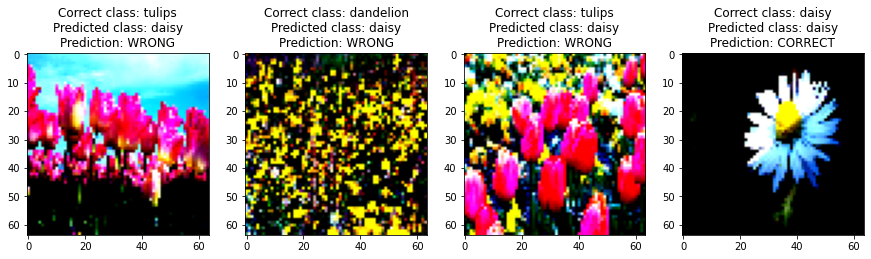

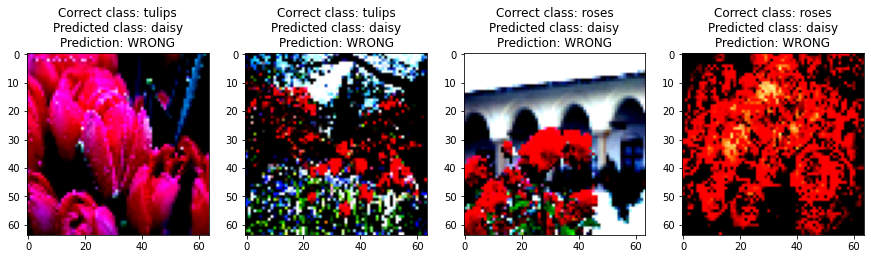

In [ ]:
## TODO: execute the test function and print the 
# accuracy value with 2 decimal places

model.to(device)
accuracy = test(model, test_loader)

print("Accuracy: {:.2f}%".format(accuracy.detach().cpu().numpy()))

### 4b. Performance curves
Plot the loss and accuracy curve.

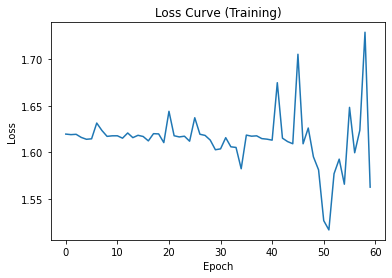

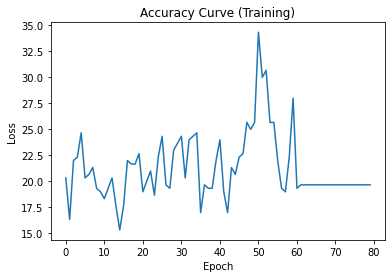

In [ ]:
## TODO:
#   * plot the loss curve;
#   * plot the accuracy curve (remember you have to modify
#     and add the code to calculate it in the 'train' function
#     if you haven't already done so).

plt.figure()
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve (Training)")
plt.show()

plt.plot(accuracy_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Accuracy Curve (Training)")
plt.show()

## 5. Extracting Features

### 5a. Load the saved network and set it to evaluation mode

Read about saving and loading models in the [documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

It's more convenient to save the model using `state_dict` (see section **3e. Save the trained network**):
```
torch.save(model.state_dict(), PATH)
```

Steps to take to load a model, especially if you open this notebook and it's not already connected to a runtime (namely, you don't have any executed code, so no defined variables, etc):
* upload to Colab the `AlexNet_flowers_saved_network.pth` file using the file browser on the left side panel (select `Files` tab > click on `Upload to session storage`);
* run all the code blocks BEFORE the training. This will re-define the model structure, which is needed to load the model;
* use `model.load_state_dict(torch.load(PATH))` to load the model (remember to read the [documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html)).


In [ ]:
## TODO: load the model and set it to evaluation mode (model.eval()).
# IMPORTANT: read the instructions above this code cell.

PATH = 'AlexNet_flowers_saved_network.pth' ;
torch.save(model.state_dict(),PATH)
model.load_state_dict(torch.load(PATH))
model.eval()


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

### 5b. Visualize the learned kernels of the first convolutional layer

#### Extract the convolutional layers from the model

Create a list called `layers_list` to save the desired layers. Add to this list the first 2 convolutional layers. 

Then, save into a variable (`first_conv_layer_filters`) the weights of the filters of the first convolutional layer.

In [ ]:
# get all the model children as list
model_children = list(model.children())

layers_list = [] # list to save the layers in

## TODO: add to the list the desired layers 
# hint: print model_children to examine it, and extract the layers from here
convLayer1 = model_children[0][0];
convLayer2 = model_children[0][3];
layers_list.extend([
                    convLayer1,
                    convLayer2
                  ]) 

# weights of the first convolutional layer
first_conv_layer_filters = model_children[0][0].weight

Print the layers in `layers_list` to check them.

In [ ]:
## TODO: print the layers in layers_list

print(layers_list[0]);
print(layers_list[1]);

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))


#### Visualize the first convolutional layer filters

Visualize 16 of the first convolutional layer filters in a 4x4 grid.

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


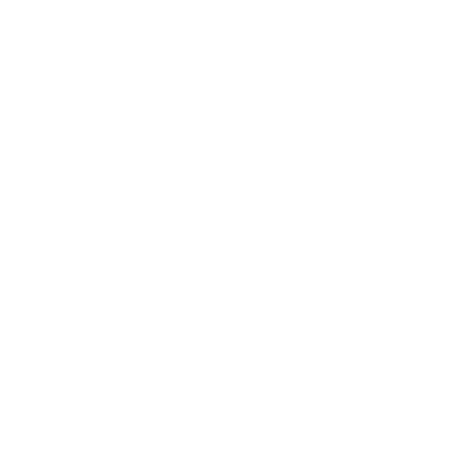

In [ ]:
# visualize 16 of the the first convolutional layer kernels
plt.figure(figsize=(8, 8)) #set the width and height of the figure
for i, filter in enumerate(first_conv_layer_filters): #loop over the kernels in the first conv layer
    if i < 16: #we want to visualize only 16 kernels
        # plot a filter
        plt.subplot(4, 4, i+1) 
        plt.imshow(filter[0, :, :].detach().cpu(), cmap='gray')
        plt.axis('off')
plt.show()

### 5c. Visualize the feature maps

#### Get an image from the test set
Get a random image from the test set and visualize it.

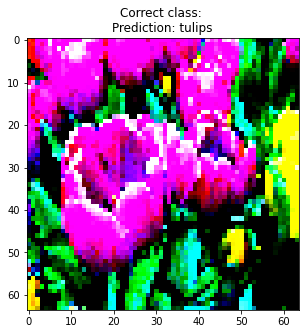

In [ ]:
## TODO: 
# * get an image and its label from the test set
# * print the image size
# * visualize the image

# the image can be randomly selected, but it's better if the flower is
# clearly visible and occupies a lot of space. So if you select an 
# image at random, run the code until a good image is selected.

labels_dict=my_dict
import random
trying_idx = random.randint(0, len(test_loader))
counter=0
batch=1

for images, labels in test_loader:
    images, labes = images.to(device), labels.to(device)
    
    if counter == trying_idx:
        img=images
        figure = plt.figure(figsize=(5,5))
        cols, rows = BATCH_SIZE, 1
        for j in range(cols):

          plt.title("Correct class: \nPrediction: {}". format(labels_dict[labels[j].item()]))
          plt.imshow(np.clip(images[j].cpu().permute(1,2,0), 0., 1.))

          counter=counter+1
          batch += 1

        


#### Pass the input image through each convolutional layer
Pass the image through the layers in `layers_list`.

In [ ]:
# TODO: pass the image through the convolutional layers
pass_first_conv = layers_list[0](img) #image passed through the first conv layer
pass_second_conv = layers_list[1](pass_first_conv) #output of first conv layer passed
                        #through the second conv layer

outputs = [pass_first_conv, pass_second_conv]

print(outputs)

[tensor([[[[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          ...,
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, nan,  ..., nan, nan, nan]],

         ...,

         [[nan, nan, nan,  ..., nan, nan, nan],
          [nan, nan, 

#### Visualize the feature maps from the 1st and 2nd convolutional layer

Visualize 16 feature maps from the first and the second convolutional layer. Note that each of the layers has more than 16 feature maps, but we want to show only 16 to visualize them better. 

In [ ]:
## TODO: visualize 16 feature maps (filters) from the 1st convolutional layer 
#        and 16 feature maps from the 2nd convolutional layer, each of them in 
#        a 4x4 grid.
# hints:
# * The code to get the 64 feature maps of the 1st conv layer is the following:
#       feature_maps = outputs[0][0, :, :, :]
#       feature_maps = feature_maps.data
#   (print its size to inspect it). Remember you have to visualize the first 16 
#   out of 64. 
# * To tile the images (e.g. no white space between them) use
#       plt.subplots_adjust(hspace=-.02, wspace=-.02)
#   right before plt.show().

feature_maps = outputs[0][0, :, :, :]
feature_maps = feature_maps.data

print(len(feature_maps))

for j, obj in enumerate(feature_maps): 
    plt.figure(figsize=(8, 8))
   

    for i, n in enumerate(feature_maps[j]):
        if i < 16:
            plt.subplot(4, 4, i+1)
            plt.subplots_adjust(hspace=-.02, wspace=-.02)
            plt.imshow(obj.detach().cpu(), cmap = 'gray')
            plt.axis('off')
            plt.show()

    

## Results, Observations and Conclusions
TODO: Write your own notes, observations and conclusions about the results of your work.



## Full Code
TODO: Report the complete code of the project.

In [ ]:
!pip install torch-inspect

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

# 1a. Download the dataset
from torchvision.datasets.utils import download_and_extract_archive

# 2a. (show AlexNet structure)
import torch_inspect as ti 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# download flower_photos  
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #URL to download file from
filename = "flower_photos.tgz" #name to save the file under
root = "~/tmp/" #directory to place downloaded file in
download_and_extract_archive(url, root, filename)


transform = transforms.Compose([
    transforms.ToTensor()
])

## TODO: load the dataset into the 'data' variable
# use ImageFolder -> https://pytorch.org/vision/stable/datasets.html#imagefolder
# hints: 
#   * you only need 'root' and 'transform';
#   * use 'flower_photos.tgz/flower_photos/' as root.

data = torchvision.datasets.ImageFolder('flower_photos.tgz/flower_photos/', transform)


## TODO: check the dataset size and get the names of the classes
# hint: check the attributes of the ImageFolder class to get the classes' names
# https://pytorch.org/vision/stable/_modules/torchvision/datasets/folder.html#ImageFolder

print("Classes: "+str(data.classes))
print("Dataset size: "+str(len(data)))

# calculate the number of samples in each class:
#   * torch.unique returns the unique elements of the input tensor;
#   * the .targets attrubute gets the class_index value for each image in the dataset.
_, imgs_per_class = torch.unique(torch.tensor(data.targets), return_counts=True)

## TODO: print the number of elements in each class
# hint: print 'imgs_per_class' to inspect it

print(imgs_per_class.numpy())

for label, num_of_imgs in zip(data.classes, imgs_per_class):
  print("There are {} elements in the class {}'". format(num_of_imgs, label))

  num_classes=len(data.classes) #5

my_dict={}
for i in range (0, num_classes):
  my_dict[i]=data.classes[i]

my_list=[]
my_list.append(0)
for i in range (1, num_classes):
    my_list.append(my_list[i-1]+imgs_per_class.numpy()[i-1])


# print("Resolution of the first image of the class:")
for i in range(0, len(my_list)):
    img, label = data[my_list[i]]
    height = img.shape[1]
    width = img.shape[2]
    print("\t"+str(data.classes[i])+" is -> "+str(height)+"x"+str(width))
    

print(my_list)
figure=plt.figure(figsize=(15,20))
# plt.subplots_adjust(hspace=0.5, wspace=0.5)
cols, rows = 4, len(data.classes)

res=[];
for j in my_list:
  for i in range(int(j), int(j+4)):
    res.append(i)

    # print(res)

for i in range(1, cols * rows + 1):
  img, label = data[res[i-1]]
  figure.add_subplot(rows, cols, i)
  plt.title(my_dict[label]+"image number "+str(1+((i-1)%cols)))
  plt.imshow(np.clip(img.permute(1, 2, 0), 0., 1.))

plt.show()

IMGS_DIM = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((IMGS_DIM, IMGS_DIM)) #resize all images to IMGS_DIMxIMGS_DIM pixels
])

## TODO: load the dataset into the 'data' variable as before
data = torchvision.datasets.ImageFolder('flower_photos.tgz/flower_photos/', transform)

# stack all the images by iterating over the dataset and extracting the images
imgs = torch.stack([img for img, _ in data], dim=3)
print(imgs.shape)

# keep 3 channels and merge all the remaining dimensions into one 
temp = imgs.view(3, -1)
print(temp.shape)

# calculate the mean over the elements of each channel
mean = temp.mean(dim=1)

# calculate the standard deviation over the elements of each channel
std = temp.std(dim=1)

print(mean, std)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std), #normalize the pixel values
    transforms.Resize((IMGS_DIM, IMGS_DIM)) #resize all images to IMGS_DIMxIMGS_DIM pixels
])

data = torchvision.datasets.ImageFolder('flower_photos.tgz/flower_photos/', transform)

## TODO: get all the first 70 indices for each class
# put them in a list called 'indices'; use the list with the indices of 
# the first image of each class you created in 1a.

indices=[];
for j in my_list;
for i in range(int(j),int(j+70)):
    indices.append(i)
    
print(indices)


# create a subset of the original dataset with just 70 samples per class
data2 = torch.utils.data.Subset(data, indices)


print("Dataset size: "+str(len(data2)))

from collections import Counter

c = Counter(obj[1] for obj in data2)

print(c)

train_size = 300
test_size = 50

train_set, test_set = torch.utils.data.random_split(data2, [train_size, test_size])

## TODO: check training set and test set size

print("Lenght of Training set: "+str(len(train_set)))
print("Lenght of Test set: "+str(len(test_set)))

import torch
model = torch.hub.load('pytorch/vision:v0.9.0', 'alexnet', pretrained = False)

## TODO: visualize the network structure
# use both 'model.eval()' and 'summary()' from the 'torch-inspect' library
import torch_inspect as ti
print(model.eval())
print(ti.summary(model, (3, 64, 64)))


## TODO: modify the layers following these specifications:

# first convolutional layer
#   * set kernel size to 7
#   * set stride to 2
#   * set padding to 3 
model.features[0] = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)

# last linear layer (classifier)
#   * set output shape to 5 (there are 5 categories) 
model.classifier[6] = nn.Linear(in_features=4096, out_features=5, bias=True)

print(model.eval())

## TODO: complete the 'test' function
# hint: it's similar to the testing part in the trainin loop in Project 1

labels_dict=my_dict
def test(model, test_loader):
    predictions_list = [] 
    total = 0
    correct = 0
    batch = 1 #batch counter
    
    for images, labels in test_loader:
        # get the inputs and load them to the computation device 
        # IMPORTANT: in Project 1 we also wrote the line
        # test = Variable(images.view(100, 1, 28, 28))
        # Since 'Variable()' is deprecated, omit this line, it is not needed.
        #...

        images, labels = images.to(device), labels.to(device)

        # prediction on the trained network
        outputs = model(images) 

        # get the predicted class
        predictions = torch.max(outputs, 1)[1].to(device) 
        # append the predicted class to 'predictions_list'
        predictions_list.append(predictions)

        correct += (predictions == labels).sum() #increase the correct predictions counter
                                                 #when the prediction matches the correct label
        total += len(labels) 

        if batch <= 2: #print the images only for the first 2 batches
            figure = plt.figure(figsize=(15, 20))
            cols, rows = BATCH_SIZE, 1
            for j in range(cols):
                # visualize the images of the batch
                figure.add_subplot(rows, cols, j+1)
                if labels[j] == predictions_list[batch-1][j]: #for each image, check if
                    pred = "CORRECT"                          #it was correctly predicted
                else:
                    pred = "WRONG"
                plt.title("Correct class: {}\nPredicted class: {}\nPrediction: {}". format(labels_dict[labels[j].item()], 
                                                                                           labels_dict[predictions_list[batch-1][j].item()],
                                                                                           pred))
                plt.imshow(np.clip(images[j].permute(1,2,0), 0., 1.))
        batch += 1

    # calculate the accuracy
    accuracy = correct * 100 / total

    return accuracy

    ## TODO: execute the test function and print the 
# accuracy value with 2 decimal places

model.to(device)
accuracy = test(model, test_loader)

print("Accuracy: {:.2f}%".format(accuracy.detach().cpu().numpy)

plt.figure()
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve (Training)")
plt.show()

plt.plot(accuracy_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Accuracy Curve (Training)")
plt.show()

PATH = 'AlexNet_flowers_saved_network.pth' ;
torch.save(model.state_dict(),PATH)
model.load_state_dict(torch.load(PATH))
model.eval()

# get all the model children as list
model_children = list(model.children())

layers_list = [] # list to save the layers in

## TODO: add to the list the desired layers 
# hint: print model_children to examine it, and extract the layers from here
convLayer1 = model_children[0][0];
convLayer2 = model_children[0][3];
layers_list.extend([
                    convLayer1,
                    convLayer2
                  ]) 

# weights of the first convolutional layer
first_conv_layer_filters = model_children[0][0].weight

print(layers_list[0]);
print(layers_list[1]);

# visualize 16 of the the first convolutional layer kernels
plt.figure(figsize=(8, 8)) #set the width and height of the figure
for i, filter in enumerate(first_conv_layer_filters): #loop over the kernels in the first conv layer
    if i < 16: #we want to visualize only 16 kernels
        # plot a filter
        plt.subplot(4, 4, i+1) 
        plt.imshow(filter[0, :, :].detach().cpu(), cmap='gray')
        plt.axis('off')
plt.show()


labels_dict=my_dict
import random
trying_idx = random.randint(0, len(test_loader))
counter=0
batch=1

for images, labels in test_loader:
    images, labes = images.to(device), labels.to(device)
    
    if counter == trying_idx:
        img=images
        figure = plt.figure(figsize=(5,5))
        cols, rows = BATCH_SIZE, 1
        for j in range(cols):

        plt.title("Correct class: \nPrediction: {}". format(labels_dict[labels[j].item()]))
        plt.imshow(np.clip(images[j].cpu().permute(1,2,0), 0., 1.))

        counter=counter+1
        batch += 1

pass_first_conv = layers_list[0](img) #image passed through the first conv layer
pass_second_conv = layers_list[1](pass_first_conv) #output of first conv layer passed
                        #through the second conv layer

outputs = [pass_first_conv, pass_second_conv]

print(outputs)

feature_maps = outputs[0][0, :, :, :]
feature_maps = feature_maps.data

print(len(feature_maps))

for j, obj in enumarate(feature_maps): 
    plt.figure(figsize=(8, 8))
   

    for i, n in enumarate(feature_maps[j]):
        if i < 16:
            plt.subplot(4, 4, i+1)
            plt.subplots_adjust(hspace=-.02, wspace=-.02)
            plt.imshow(obj.detach().cpu(), cmap = 'gray')
            plt.axis('off')
            plt.show()

